# Homework 3 - 2D Cellular Automata

Upload the completed notebook with *firstname_lastname-HW3*.

Remember: code needs to be implemented in your own words. No copy-pasting. 

## Excercise 1 

Build an `update` function that takes a numpy array of 0s and 1s and implements the game of life rules on it using wrap-around boundary conditions. 


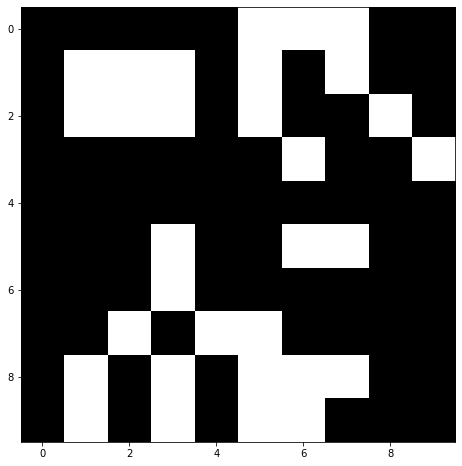

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.randint(2, size = ((10,10))) #array of random 0s & 1s 

def update(x):
    
    #Get the shape of the universe
    rows, cols = x.shape
    
    #Create a structure for the new universe 
    xnew = np.zeros(x.shape)
    
    #Find the number of living neighbors for every cell
    #Do NOT forget about the wrap around boundary conditions 
    
    for i, j in np.ndindex(x.shape):
        total =(x[i, (j-1)%rows] #Left
                + x[i, (j+1)%rows] #Right
                + x[(i-1)%cols, j] #Up
                + x[(i+1)%cols, j] #Down 
                + x[(i-1)%cols, (j-1)%rows] #Up & to the left 
                + x[(i-1)%cols, (j+1)%rows] #Up & to the right
                + x[(i+1)%cols, (j-1)%rows] #Down & to the left 
                + x[(i+1)%cols, (j+1)%rows] #Down & to the right 
               )
        
        #now implement the rules 
        if x[i,j] == 1: #Look to see if the current cell is alive (if it is alive..)
        
            if (total < 2) or (total > 3): #due to over or under population  
                xnew[i,j] == 0
            else: #any cell with 2 or 3 neighbors lives on 
                xnew[i,j] = 1
                
        else: #equivalent to x[i,j] == 0
            if (total == 3): #Condition of birth 
                xnew[i,j] = 1
            else:
                xnew[i,j] = 0 #This is redundant because our orginal array is already made of zeros
                
    return xnew     

plt.figure(figsize = (8,8))
plt.imshow(x, cmap = 'gray')
plt.imshow((update(x)), cmap = 'gray')

## Excercise 2
Use the `plant_seed` function provided to place the follow a glider (also provided) on a 20x20 grid. Animate the glider forward in time 100 generations.  

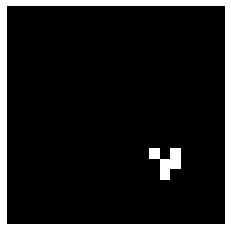

In [62]:
 def ceil(a, b):
        return -(-a // b)
    
    
    
glider = np.array([[0,0,1],[1,0,1],[0,1,1]]) #making the glider 


def plant_seed(seed, nrow, ncol):
    soil = np.zeros((nrow, ncol))
    
    rowu = soil.shape[0]//2 +seed.shape[0]//2 #upper row
    rowl = ceil(soil.shape[0],2) - ceil(seed.shape[0],2) #lower row 
    colu = soil.shape[1] // 2 +seed.shape[1] // 2 #upper column 
    coll = ceil(soil.shape[1],2) - ceil(seed.shape[1],2) #lower column 
    
    soil[rowl:rowu, coll:colu] = seed 
    
    planted_seed = soil
    
    return planted_seed 

    
def animatelife(glider, n): #glider array and the number of generations as the input
    
    for i in range(n): #for a position in the number of generations 'n'
        plt.imshow(glider, cmap= 'gray') # what is animating the glider 
        plt.axis('off')
        plt.show()
        
        glider = update(glider) #using update rules previously defined to continuously 'update' the glider every generation 
        clear_output(wait= True) #clearning the previous output, and using the new updated glider instead to run the animation

seed = glider
print('i')
universe = plant_seed(seed,20,20) #animate the glider in a 20x20 grid 
print('i')
n = 100 #number of generations 

animatelife(universe, n)    

## Excercise 3

Bacterial populations have been shown to compete in a real-life rock paper scissors game that results in complex dynamics. 

If you want to learn more about this see *Benjamin Kerr, Margaret A. Riley, Marcus W. Feldman & Brendan J. M. Bohannan. Local dispersal promotes biodiversity in a real-life game of rock-paper-scissors*

Simulate these competing bacterial populations using a 3 state, 2D CA where the states are 0, 1, and 2. Use the rock-paper-scissors rule where 1 beats 0, 2 beats 1, and 0 beats 2. 

Make the rule set such that each cell plays against all cells in its neighborhood and adopts the state of any cell that beats it. 

Use the Moore neighborhood (https://en.wikipedia.org/wiki/Moore_neighborhood) and wraparound boundary conditions. 

Simulate both random initial conditions and sectored initial conditions, meaning 3 quadrants of 0,1,2.





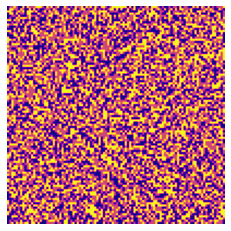

In [63]:
######## Update Rules & Boundary Conditions ################## 
import numpy as np

def update(x):
    
    #Get the shape of the universe
    rows, cols = x.shape
    #Create a structure for the new universe 
    xnew = np.zeros(x.shape)
 
        #update rules & wrap-around boundary conditions  
    for i, j in np.ndindex(x.shape):
            # given a cell is 2 --> if any neighbor is a 0 then, then the initial cell becomes a 0 
        if x[i, j] == 2:
            if (x[i, (j-1)%rows] == 0) or (x[i, (j+1)%rows] == 0) or (x[(i-1)%cols, j] == 0) or (x[(i+1)%cols, j] == 0) or (x[(i-1)%cols, (j-1)%rows] == 0) or (x[(i-1)%cols, (j+1)%rows] == 0) or (x[(i+1)%cols, (j-1)%rows] == 0) or (x[(i+1)%cols, (j+1)%rows] == 0):
                xnew[i, j] = 0 
                
                # given a cell is 0 --> if any neighbor is a 1 then, then the initial cell becomes a 1 
        elif x[i, j] == 0:
            if (x[i, (j-1)%rows] == 1) or (x[i, (j+1)%rows] == 1) or (x[(i-1)%cols, j] == 1) or (x[(i+1)%cols, j] == 1) or (x[(i-1)%cols, (j-1)%rows] == 1) or (x[(i-1)%cols, (j+1)%rows] == 1) or (x[(i+1)%cols, (j-1)%rows] == 1) or (x[(i+1)%cols, (j+1)%rows] == 1):
                xnew[i, j] = 1
                
                # given a cell is 1 --> if any neighbor is a 2 then, then the initial cell becomes a 2 
        else:           
            if (x[i, (j-1)%rows] == 2) or (x[i, (j+1)%rows] == 2) or (x[(i-1)%cols, j] == 2) or (x[(i+1)%cols, j] == 2) or (x[(i-1)%cols, (j-1)%rows] == 2) or (x[(i-1)%cols, (j+1)%rows] == 2) or (x[(i+1)%cols, (j-1)%rows] == 2) or (x[(i+1)%cols, (j+1)%rows] == 2):
                xnew[i, j] = 2
    
    return xnew 
        
        
######## Initial Conditions ##################

from IPython.display import clear_output 
from time import sleep 

universe = np.random.randint(3, size = (100,100)) # random initial conditions 

#universe = np.zeros((99,99)) # sectored intial conditions
#universe[:,33:66] = 1
#universe[:,66:99] = 2

print(universe)


######## Animating the Bacterial Dynamics ##################    
def animatelife(x, generations, updateFunc, colstr):
    for i in range(n):
        plt.imshow(x, cmap = colstr) #colorstring = colstr
        plt.axis('off')
        plt.show()
            
        x = updateFunc(x)
        
        clear_output(wait = True)
        
animatelife(universe, 100, update, 'plasma')
    

# Excercise 4: Extra Credit (Not optional for graduate students)
Review this week's reading entitled *Cellular Automata Approaches to Biological Modeling*.
Implement the Young Model, the coupled oscillator model, or a Growth Automata model (such as diffusion limited aggregation). Comment on how your simulation could be used to increase intuition on the biological phenomenon simulated.


Please state who you worked with: